In [2]:
pip install mne


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings('ignore')

import mne
import os
from glob import glob
from tabulate import tabulate

# Path to your FIF files (Kaggle input directory)
fif_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons"

# Verify path exists
if not os.path.exists(fif_path):
    raise FileNotFoundError(f"Path not found: {fif_path}")

# Get all FIF files
fif_files = sorted(glob(os.path.join(fif_path, "*.fif")))
print(f"\nFound {len(fif_files)} FIF files\n")

# Prepare table data
table_data = []
headers = ["#", "Filename", "Duration (s)", "Channels", "Sample Rate (Hz)", "Samples"]

for i, fif_file in enumerate(fif_files, 1):
    try:
        raw = mne.io.read_raw_fif(fif_file, preload=False, verbose=False)
        samples = raw.n_times
        duration = raw.times[-1]
        channels = len(raw.ch_names)
        sfreq = raw.info['sfreq']

        table_data.append([
            i,
            os.path.basename(fif_file),
            f"{duration:.1f}",
            channels,
            f"{sfreq:.1f}",
            samples
        ])
    except Exception as e:
        print(f"Error processing {os.path.basename(fif_file)}: {str(e)}")
        table_data.append([i, os.path.basename(fif_file), "ERROR", str(e), "", ""])

# Display the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Calculate and display summary statistics
valid_entries = [row for row in table_data if isinstance(row[2], str) and row[2] != "ERROR" and row[5] != ""]
if valid_entries:
    durations = [float(row[2]) for row in valid_entries]
    channels = [int(row[3]) for row in valid_entries]
    sfreqs = [float(row[4]) for row in valid_entries]
    samples = [int(row[5]) for row in valid_entries]

    print("\nSUMMARY STATISTICS:")
    print(f"Total files processed: {len(valid_entries)}/{len(fif_files)}")
    print(f"Duration: {min(durations):.1f}s (min) | {max(durations):.1f}s (max) | {sum(durations)/len(durations):.1f}s (avg)")
    print(f"Channels: {min(channels)}-{max(channels)} (all EEG)")
    print(f"Sample rate: {min(sfreqs):g} Hz (consistent)" if min(sfreqs) == max(sfreqs) else f"Sample rates vary: {min(sfreqs):g}-{max(sfreqs):g} Hz")
    print(f"Samples: {min(samples):,} (min) | {max(samples):,} (max) | {sum(samples)//len(samples):,} (avg)")
else:
    print("\nNo valid files found for summary statistics")




Found 30 FIF files

+-----+--------------+----------------+------------+--------------------+-----------+
|   # | Filename     |   Duration (s) |   Channels |   Sample Rate (Hz) |   Samples |
+=====+==============+================+============+====================+===========+
|   1 | hc01_raw.fif |            192 |         32 |                512 |     98304 |
+-----+--------------+----------------+------------+--------------------+-----------+
|   2 | hc02_raw.fif |            194 |         32 |                512 |     99328 |
+-----+--------------+----------------+------------+--------------------+-----------+
|   3 | hc04_raw.fif |            181 |         32 |                512 |     92672 |
+-----+--------------+----------------+------------+--------------------+-----------+
|   4 | hc07_raw.fif |            192 |         32 |                512 |     98304 |
+-----+--------------+----------------+------------+--------------------+-----------+
|   5 | hc08_raw.fif |           

In [6]:
raw = mne.io.read_raw_fif(fif_files[0], preload=False)
eeg_channels = mne.pick_types(raw.info, eeg=True)
print(", ".join([raw.ch_names[i] for i in eeg_channels]))

Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc01_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 98303 =      0.000 ...   191.998 secs
Ready.
Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, O1, Oz, O2, PO4, P4, P8, CP6, CP2, C4, T8, FC6, FC2, F4, F8, AF4, Fp2, Fz, Cz


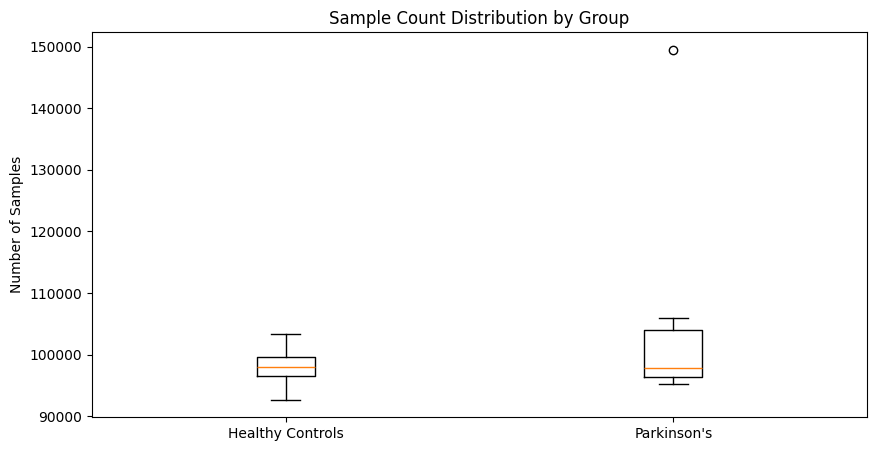

In [7]:
# Plot sample distributions by group
import matplotlib.pyplot as plt
import numpy as np

# Separate HC and PD samples
hc_samples = [row[5] for row in table_data if "hc" in row[1].lower()]
pd_samples = [row[5] for row in table_data if "pd" in row[1].lower()]

plt.figure(figsize=(10,5))
plt.boxplot([hc_samples, pd_samples], labels=['Healthy Controls', 'Parkinson\'s'])
plt.title('Sample Count Distribution by Group')
plt.ylabel('Number of Samples')
plt.show()


=== File info (pd03_raw.fif) ===
Channels (32): ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
Sampling frequency: 512.0 Hz
Duration: 200.00 seconds
Number of samples: 102400
Data shape: (32, 102400)

No sensor position information found in the file.
Creating custom channel layout visualization instead...


<Figure size 1500x1000 with 0 Axes>

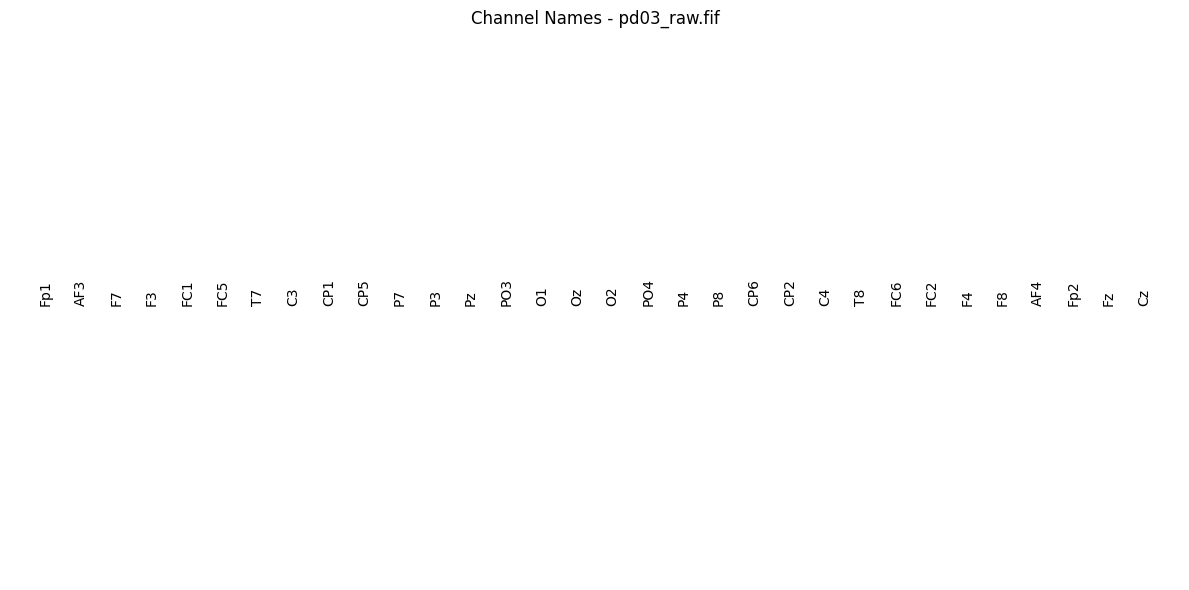

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


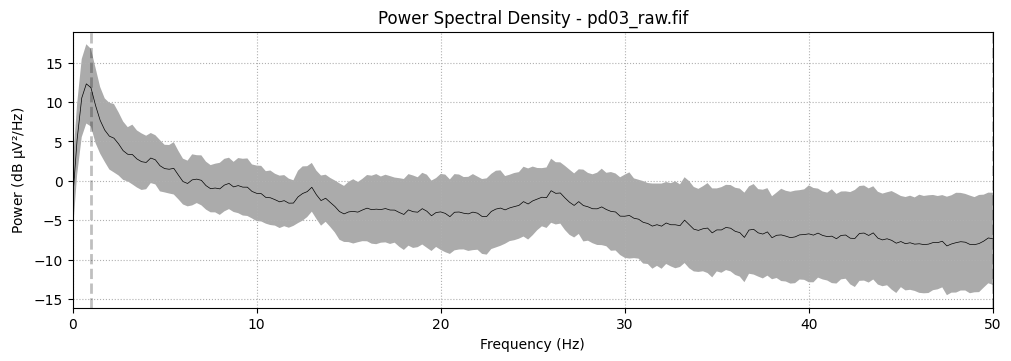

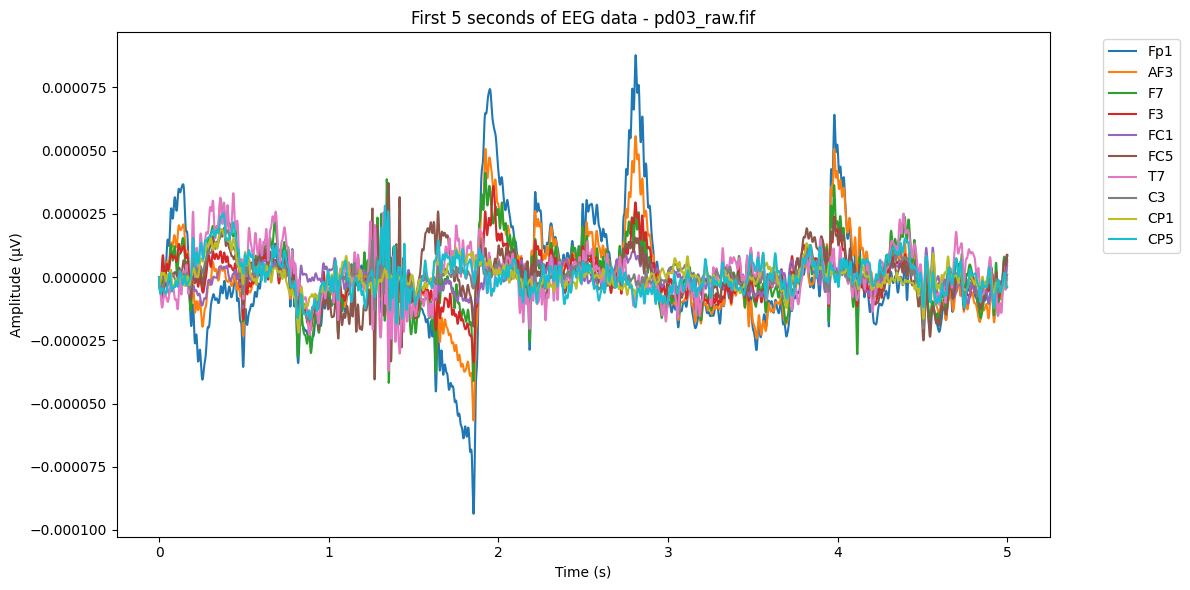

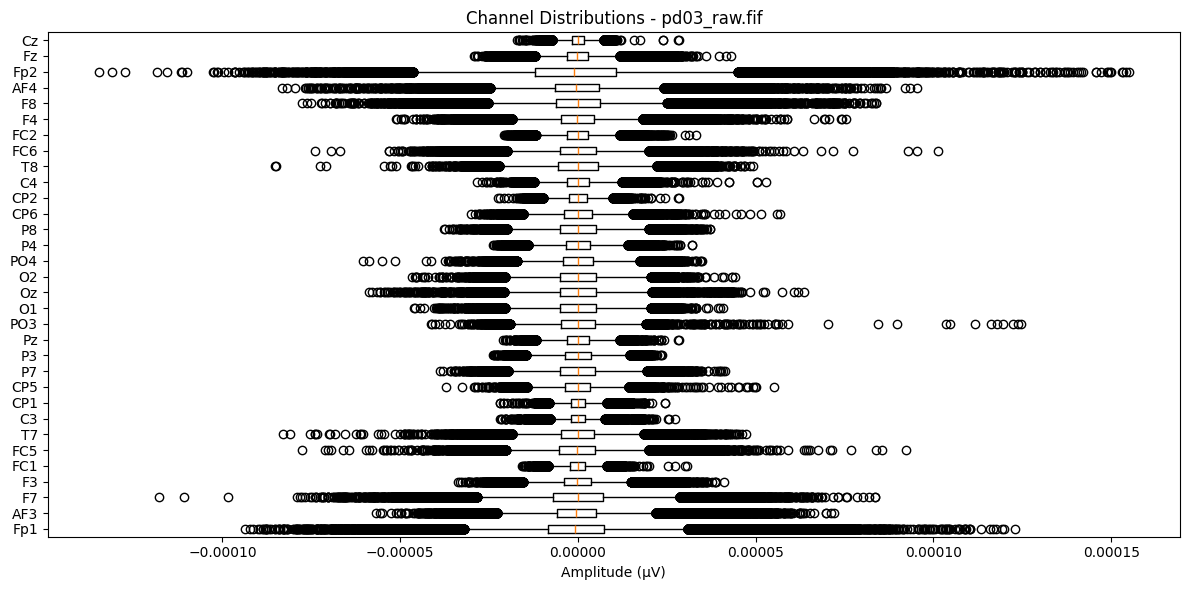


=== Dataset Summary ===
       Filename  Duration(s)  Channels  SampleRate(Hz)  Samples SubjectID  \
0  pd03_raw.fif   199.998047        32           512.0   102400      pd03   

  Group  
0    PD  

=== Group Statistics ===
      Duration(s)                             Channels SampleRate(Hz)  \
             mean std         min         max    first          first   
Group                                                                   
PD     199.998047 NaN  199.998047  199.998047       32          512.0   

        Samples                      
           mean std     min     max  
Group                                
PD     102400.0 NaN  102400  102400  

Metadata saved to dataset_metadata.csv


In [10]:
import mne
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set path to your FIF files
data_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons"
file_list = [f for f in os.listdir(data_path) if f.endswith('.fif')]

# Initialize a dataframe to store file metadata
metadata = pd.DataFrame(columns=['Filename', 'Duration(s)', 'Channels',
                                'SampleRate(Hz)', 'Samples', 'SubjectID', 'Group'])

# Create a figure for channel visualization
plt.figure(figsize=(15, 10))

# Basic data inspection for each file
for i, file in enumerate(file_list[:1]):  # Just process first file for inspection
    file_path = os.path.join(data_path, file)

    # Load the raw file
    raw = mne.io.read_raw_fif(file_path, preload=True, verbose=False)

    # Extract metadata
    subject_id = file.split('_')[0]
    group = 'HC' if subject_id.startswith('hc') else 'PD'

    # Add to metadata dataframe
    metadata.loc[len(metadata)] = {
        'Filename': file,
        'Duration(s)': raw.times[-1],
        'Channels': len(raw.ch_names),
        'SampleRate(Hz)': raw.info['sfreq'],
        'Samples': len(raw),
        'SubjectID': subject_id,
        'Group': group
    }

    # Print basic info for first file
    print(f"\n=== File info ({file}) ===")
    print(f"Channels ({len(raw.ch_names)}): {raw.ch_names}")
    print(f"Sampling frequency: {raw.info['sfreq']} Hz")
    print(f"Duration: {raw.times[-1]:.2f} seconds")
    print(f"Number of samples: {len(raw)}")
    print(f"Data shape: {raw.get_data().shape}")

    # Plot channel locations (if available)
    try:
        raw.plot_sensors(show_names=True, title='Channel Locations')
    except RuntimeError:
        print("\nNo sensor position information found in the file.")
        print("Creating custom channel layout visualization instead...")

        # Create a simple visualization of channel names
        plt.figure(figsize=(12, 6))
        plt.title(f"Channel Names - {file}")
        for j, ch in enumerate(raw.ch_names):
            plt.text(j, 0, ch, rotation=90, ha='center', va='bottom')
        plt.xlim(-1, len(raw.ch_names))
        plt.ylim(-0.1, 0.1)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Plot power spectral density
    raw.plot_psd(fmax=50, average=True, spatial_colors=False)
    plt.title(f"Power Spectral Density - {file}")
    plt.show()

    # Plot first 5 seconds of data (first 10 channels)
    plt.figure(figsize=(12, 6))
    data, times = raw[:, :int(5 * raw.info['sfreq'])]
    plt.plot(times, data[:10].T)
    plt.title(f"First 5 seconds of EEG data - {file}")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (μV)')
    plt.legend(raw.ch_names[:10], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot channel distributions
    plt.figure(figsize=(12, 6))
    plt.boxplot(raw.get_data().T, vert=False)
    plt.yticks(np.arange(1, len(raw.ch_names)+1), raw.ch_names)
    plt.title(f"Channel Distributions - {file}")
    plt.xlabel('Amplitude (μV)')
    plt.tight_layout()
    plt.show()

# Display metadata summary
print("\n=== Dataset Summary ===")
print(metadata)

# Group statistics
print("\n=== Group Statistics ===")
print(metadata.groupby('Group').agg({
    'Duration(s)': ['mean', 'std', 'min', 'max'],
    'Channels': 'first',
    'SampleRate(Hz)': 'first',
    'Samples': ['mean', 'std', 'min', 'max']
}))

# Save metadata to CSV
metadata.to_csv('dataset_metadata.csv', index=False)

print("\nMetadata saved to dataset_metadata.csv")

In [12]:
# Create a standard 10-20 montage and apply it to your data
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='warn')  # This will now allow sensor plots

<Raw | pd03_raw.fif, 32 x 102400 (200.0 s), ~25.0 MiB, data loaded>

In [13]:
import traceback
from tabulate import tabulate  # for table summary


In [16]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 12.9 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from tabulate import tabulate

# Setup
input_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons"
output_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed"

os.makedirs(output_path, exist_ok=True)

# Initialize progress table
progress_table = []

def process_file(file_path):
    """EEG-only processing pipeline without EOG or bad file checks"""
    file_name = os.path.basename(file_path)

    # 1. Load with standard montage
    raw = mne.io.read_raw_fif(file_path, preload=True)
    raw.set_montage('standard_1020')

    # 2. Pick only EEG channels
    raw.pick_types(eeg=True)

    # 3. Filtering
    raw.filter(0.5, 45., fir_design='firwin')
    raw.notch_filter(50.)

    # 4. ICA (without EOG removal)
    ica = ICA(n_components=15, max_iter=500, random_state=97)
    ica.fit(raw.copy().filter(1., None))
    ica.apply(raw)

    # 5. Epoching and PSD feature extraction
    epochs = mne.make_fixed_length_epochs(raw, duration=2.0, overlap=0.5)
    psds = epochs.compute_psd(method='welch', fmin=0.5, fmax=45.)
    bands = [(0.5,4,'delta'), (4,8,'theta'), (8,13,'alpha'),
             (13,30,'beta'), (30,45,'gamma')]

    features = []
    for fmin, fmax, _ in bands:
        features.append(psds.get_data(fmin=fmin, fmax=fmax).mean(axis=-1))

    features = np.stack(features, axis=-1)
    label = 0 if 'hc' in file_name.lower() else 1

    progress_table.append([
        file_name,
        "✓",
        len(raw.ch_names),
        raw.times[-1],
        len(epochs),
        "N/A"
    ])

    return features, label

# Process all files
X, y, valid_files = [], [], []
for file in sorted(f for f in os.listdir(input_path) if f.endswith('.fif')):
    features, label = process_file(os.path.join(input_path, file))
    X.append(features)
    y.extend([label]*len(features))
    valid_files.append(file)

# Display processing results
print("\nProcessing Summary:")
print(tabulate(progress_table,
               headers=["File", "Status", "Channels", "Duration(s)", "Epochs", "Bad Channels"],
               tablefmt="grid"))

# Save results
np.savez(os.path.join(output_path, 'parkinson_data.npz'),
         X=np.concatenate(X),
         y=np.array(y),
         files=valid_files,
         bands=['delta','theta','alpha','beta','gamma'])

print(f"\nSaved {len(X)} files with {np.concatenate(X).shape[0]} total epochs")


Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc01_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 98303 =      0.000 ...   191.998 secs
Ready.
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 3381 samp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc02_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 99327 =      0.000 ...   193.998 secs
Ready.
Reading 0 ... 99327  =      0.000 ...   193.998 secs...
NOTE: pick_types() is a legacy function. New 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
129 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 129 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc04_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 92671 =      0.000 ...   180.998 secs
Ready.
Reading 0 ... 92671  =      0.000 ...   180.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
120 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 120 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc07_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 98303 =      0.000 ...   191.998 secs
Ready.
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Settin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc08_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 97791 =      0.000 ...   190.998 secs
Ready.
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Settin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc10_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 102911 =      0.000 ...   200.998 secs
Ready.
Reading 0 ... 102911  =      0.000 ...   200.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Sett

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
133 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 133 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc18_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Settin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
123 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 123 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc20_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 94207 =      0.000 ...   183.998 secs
Ready.
Reading 0 ... 94207  =      0.000 ...   183.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
122 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 122 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc21_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 96767 =      0.000 ...   188.998 secs
Ready.
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
125 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 125 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc24_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 98303 =      0.000 ...   191.998 secs
Ready.
Reading 0 ... 98303  =      0.000 ...   191.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc25_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 103423 =      0.000 ...   201.998 secs
Ready.
Reading 0 ... 103423  =      0.000 ...   201.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
134 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 134 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc29_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 101887 =      0.000 ...   198.998 secs
Ready.
Reading 0 ... 101887  =      0.000 ...   198.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
132 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 132 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc30_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 96767 =      0.000 ...   188.998 secs
Ready.
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
125 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 125 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc31_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 95743 =      0.000 ...   186.998 secs
Ready.
Reading 0 ... 95743  =      0.000 ...   186.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
124 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 124 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc32_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 100351 =      0.000 ...   195.998 secs
Ready.
Reading 0 ... 100351  =      0.000 ...   195.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
130 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 130 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/hc33_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 97279 =      0.000 ...   189.998 secs
Ready.
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
126 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 126 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd03_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 102399 =      0.000 ...   199.998 secs
Ready.
Reading 0 ... 102399  =      0.000 ...   199.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
133 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 133 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd05_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 100863 =      0.000 ...   196.998 secs
Ready.
Reading 0 ... 100863  =      0.000 ...   196.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
131 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 131 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd06_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 97791 =      0.000 ...   190.998 secs
Ready.
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd09_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 97791 =      0.000 ...   190.998 secs
Ready.
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd11_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
123 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 123 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd12_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 105983 =      0.000 ...   206.998 secs
Ready.
Reading 0 ... 105983  =      0.000 ...   206.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
137 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 137 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd13_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 95231 =      0.000 ...   185.998 secs
Ready.
Reading 0 ... 95231  =      0.000 ...   185.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
123 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 123 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd14_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 149503 =      0.000 ...   291.998 secs
Ready.
Reading 0 ... 149503  =      0.000 ...   291.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
194 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 194 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd16_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 96255 =      0.000 ...   187.998 secs
Ready.
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Settin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
125 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 125 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd17_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 96767 =      0.000 ...   188.998 secs
Ready.
Reading 0 ... 96767  =      0.000 ...   188.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
125 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 125 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd22_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 96255 =      0.000 ...   187.998 secs
Ready.
Reading 0 ... 96255  =      0.000 ...   187.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
125 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 125 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd23_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 104447 =      0.000 ...   203.998 secs
Ready.
Reading 0 ... 104447  =      0.000 ...   203.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
135 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 135 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd26_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 97791 =      0.000 ...   190.998 secs
Ready.
Reading 0 ... 97791  =      0.000 ...   190.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
127 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 127 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Opening raw data file /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons/pd28_raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 40)  idle
    Range : 0 ... 105471 =      0.000 ...   205.998 secs
Ready.
Reading 0 ... 105471  =      0.000 ...   205.998 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Not setting metadata
137 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 137 events and 1024 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)

Processing Summary:
+--------------+----------+------------+---------------+----------+----------------+
| File         | Status   |   Channels |   Duration(s) |   Epochs | Bad Channels   |
+==============+==========+============+===============+==========+================+
| hc01_raw.fif | ✓        |         32 |       191.998 |      127 | N/A            |
+--------------+----------+------------+---------------+----------+----------------+
| hc02_raw.fif | ✓        |         32 |       193.998 |      129 | N/A            |
+---

In [19]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA
from tabulate import tabulate

# Paths
input_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Parkinsons"
output_path = "/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed"
os.makedirs(output_path, exist_ok=True)

# Step 1: Get durations of all valid files
durations = {}
for file in sorted(os.listdir(input_path)):
    if file.endswith(".fif"):
        try:
            raw = mne.io.read_raw_fif(os.path.join(input_path, file), preload=False, verbose=False)
            durations[file] = raw.times[-1]
        except Exception as e:
            print(f"Skipping {file}: {e}")

if not durations:
    raise RuntimeError("No valid .fif files found!")

# Shortest duration
min_duration = min(durations.values())

# Step 2: Preprocess and save
progress_table = []

for file in sorted(durations):
    file_path = os.path.join(input_path, file)
    try:
        raw = mne.io.read_raw_fif(file_path, preload=True, verbose=False)

        # Set montage and pick only EEG
        raw.set_montage("standard_1020")
        raw.pick_types(eeg=True)

        # Bandpass + Notch filtering
        raw.filter(0.5, 45., fir_design="firwin", verbose=False)
        raw.notch_filter(freqs=50.0, verbose=False)

        # ICA (artifact removal)
        ica = ICA(n_components=15, max_iter=500, random_state=97, verbose=False)
        ica.fit(raw.copy().filter(1., None))
        ica.apply(raw)

        # Trim to minimum duration
        raw.crop(tmin=0, tmax=min_duration)

        # Save cleaned file
        out_path = os.path.join(output_path, file)
        raw.save(out_path, overwrite=True)

        # Log
        progress_table.append([
            file,
            "✓",
            len(raw.ch_names),
            round(raw.times[-1], 2)
        ])

    except Exception as e:
        progress_table.append([
            file,
            f"✗ ({str(e)})",
            "-",
            "-"
        ])

# Show progress
print("\nPreprocessing Summary:")
print(tabulate(progress_table, headers=["File", "Status", "EEG Channels", "Duration (s)"], tablefmt="grid"))


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 15 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc01_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc01_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc02_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc02_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc04_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc04_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc07_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc07_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc08_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc08_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc10_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc10_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc18_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc18_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc20_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc20_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc21_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc21_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc24_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc24_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc25_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc25_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc29_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc29_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc30_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc30_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc31_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc31_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc32_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc32_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc33_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/hc33_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd03_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd03_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd05_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd05_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd06_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd06_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.5s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd09_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd09_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd11_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd11_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd12_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd12_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd13_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd13_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd14_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd14_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd16_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd16_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd17_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd17_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd22_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd22_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd23_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd23_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd26_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd26_raw.fif
[done]
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data usin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd28_raw.fif
Closing /Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed/pd28_raw.fif
[done]

Preprocessing Summary:
+--------------+----------+----------------+----------------+
| File         | Status   |   EEG Channels |   Duration (s) |
+==============+==========+================+================+
| hc01_raw.fif | ✓        |             32 |            181 |
+--------------+----------+----------------+----------------+
| hc02_raw.fif | ✓        |             32 |            181 |
+--------------+----------+----------------+----------------+
| hc04_raw.fif | ✓        |             32 |            181 |
+--------------+----------+---

In [ ]:
import mne
import numpy as np
import pandas as pd
import os
from scipy.stats import skew, kurtosis, entropy

# ----- Settings -----
input_folder = '/kaggle/working/processed/'  # <-- your cleaned + cropped .fif folder
output_csv = 'eeg_features_labeled.csv'

# Power band limits in Hz
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30)
}

# Feature extraction for one subject
def extract_features(file_path):
    try:
        raw = mne.io.read_raw_fif(file_path, preload=True, verbose=False)
        raw.pick("eeg")  # Keep only EEG

        data = raw.get_data()
        sfreq = raw.info['sfreq']
        features = {}

        for ch_idx, ch_name in enumerate(raw.ch_names):
            ch_data = data[ch_idx]
            features[f'{ch_name}_mean'] = np.mean(ch_data)
            features[f'{ch_name}_std'] = np.std(ch_data)
            features[f'{ch_name}_skew'] = skew(ch_data)
            features[f'{ch_name}_kurtosis'] = kurtosis(ch_data)
            features[f'{ch_name}_entropy'] = entropy(np.abs(ch_data) + 1e-8)

        psds, freqs = mne.time_frequency.psd_array_welch(
            data, sfreq=sfreq, fmin=0.5, fmax=30.0, n_fft=1024, verbose=False
        )

        # Power band features averaged across channels
        for band, (fmin, fmax) in freq_bands.items():
            band_power = psds[:, (freqs >= fmin) & (freqs <= fmax)].mean(axis=1)
            features[f'{band}_power_mean'] = np.mean(band_power)
            features[f'{band}_power_std'] = np.std(band_power)

        return features

    except Exception as e:
        print(f'Error processing {file_path}: {e}')
        return None

# Walk through all files and extract
records = []

for file in os.listdir(input_folder):
    if file.endswith('.fif'):
        full_path = os.path.join(input_folder, file)
        feats = extract_features(full_path)
        if feats:
            feats['file'] = file
            feats['label'] = 0 if 'hc' in file.lower() else 1
            records.append(feats)

# Save to CSV
df = pd.DataFrame(records)
df.to_csv(output_csv, index=False)
print(f"✅ Saved: {output_csv} with shape {df.shape}")


In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:

# Install MNE if not already

import os
import numpy as np
import mne
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Parameters
DATA_PATH = '/Users/sasisekharapreetamkommavarapu/Library/Mobile Documents/com~apple~CloudDocs/Projects/parkinonsdd/Processed'
SEGMENT_DURATION = 10  # seconds
SAMPLING_RATE = 250
SAMPLES_PER_SEGMENT = SEGMENT_DURATION * SAMPLING_RATE
CHANNELS = 32

# Load and preprocess
segments = []
labels = []

file_list = [f for f in os.listdir(DATA_PATH) if f.endswith('.fif')]

for fname in file_list:
    fpath = os.path.join(DATA_PATH, fname)
    raw = mne.io.read_raw_fif(fpath, preload=True, verbose=False)
    data = raw.get_data()[:CHANNELS]  # Only first 32 channels
    data = (data - np.mean(data, axis=1, keepdims=True)) / np.std(data, axis=1, keepdims=True)  # z-score normalization

    total_samples = data.shape[1]
    num_segments = total_samples // SAMPLES_PER_SEGMENT

    for i in range(num_segments):
        start = i * SAMPLES_PER_SEGMENT
        end = start + SAMPLES_PER_SEGMENT
        segment = data[:, start:end].T  # Shape: (2500, 32)
        if segment.shape != (SAMPLES_PER_SEGMENT, CHANNELS):
            continue
        segments.append(segment)
        labels.append(1 if 'pd' in fname.lower() else 0)

X = np.array(segments)
y = np.array(labels)

print(f"Total segments: {X.shape[0]}, Shape per segment: {X.shape[1:]}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# CNN-LSTM model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(SAMPLES_PER_SEGMENT, CHANNELS)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.5),

    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")


# Save weights as a dictionary
weights = model.get_weights()

with open('model_weights.pkl', 'wb') as f:
    pickle.dump(weights, f)

model.save('my_model.h5')

Total segments: 1110, Shape per segment: (2500, 32)
Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5140 - loss: 0.7171 - val_accuracy: 0.5562 - val_loss: 0.6867
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.4634 - loss: 0.7033 - val_accuracy: 0.5730 - val_loss: 0.6839
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5143 - loss: 0.7020 - val_accuracy: 0.5674 - val_loss: 0.6860
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.5212 - loss: 0.6903 - val_accuracy: 0.5112 - val_loss: 0.6980
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.5534 - loss: 0.6915 - val_accuracy: 0.5730 - val_loss: 0.6906
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5771 - loss: 0.6806 - val_accuracy: 0.5730 - val_loss: 0.6843
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.6047 - loss: 0.6623 - val_accuracy: 0.5562 - val_loss: 0.7069
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.


✅ Test Accuracy: 0.5270
